
# Housing Price Prediction using Linear Regression Models

In [12]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 55000

# Generate features
# Feature 1: House size in square feet (1000-5000)
house_size = np.random.uniform(1000, 5000, n_samples)

# Feature 2: Number of bedrooms (1-6)
bedrooms = np.random.randint(1, 7, n_samples)

# Feature 3: Age of house in years (0-50)
age = np.random.uniform(0, 50, n_samples)

# Feature 4: Distance to city center in km (1-30)
distance = np.random.uniform(1, 30, n_samples)

# Feature 5: Number of bathrooms (1-4)
bathrooms = np.random.uniform(1, 4.5, n_samples)

# Generate target variable: House Price
# True relationship: Price = 50000 + 150*size + 20000*bedrooms - 800*age - 2000*distance + 15000*bathrooms + noise
true_price = (50000 +
              150 * house_size +
              20000 * bedrooms -
              800 * age -
              2000 * distance +
              15000 * bathrooms)

# Add realistic noise
noise = np.random.normal(0, 30000, n_samples)
house_price = true_price + noise

# Create DataFrame
df = pd.DataFrame({
    'house_size_sqft': house_size.round(2),
    'bedrooms': bedrooms,
    'age_years': age.round(2),
    'distance_to_center_km': distance.round(2),
    'bathrooms': bathrooms.round(1),
    'price_usd': house_price.round(2)
})

# Save to CSV
filename = 'housing_linear_regression_data.csv'
df.to_csv(filename, index=False)

print(f"✓ Generated {len(df)} rows of data")
print(f"✓ Saved to '{filename}'")
print(f"\nDataset Preview:")
print(df.head(10))
print(f"\nDataset Statistics:")
print(df.describe())
print(f"\nColumn Names: {list(df.columns)}")
print(f"\nTarget Variable: 'price_usd'")
print(f"Features: {list(df.columns[:-1])}")

✓ Generated 55000 rows of data
✓ Saved to 'housing_linear_regression_data.csv'

Dataset Preview:
   house_size_sqft  bedrooms  ...  bathrooms  price_usd
0          2498.16         5  ...        3.2  454138.62
1          4802.86         3  ...        2.5  850772.65
2          3927.98         3  ...        3.5  651234.20
3          3394.63         3  ...        3.9  678996.94
4          1624.07         2  ...        2.5  315468.35
5          1623.98         3  ...        2.8  358296.11
6          1232.33         2  ...        1.0  242427.85
7          4464.70         6  ...        3.7  883109.03
8          3404.46         4  ...        2.6  625082.53
9          3832.29         5  ...        4.3  739300.29

[10 rows x 6 columns]

Dataset Statistics:
       house_size_sqft      bedrooms  ...     bathrooms     price_usd
count     55000.000000  55000.000000  ...  55000.000000  5.500000e+04
mean       2997.378801      3.503291  ...      2.755193  5.599264e+05
std        1153.581801      1.707

In [13]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('housing_linear_regression_data.csv')
# Display the entire DataFrame
df

,house_size_sqft,bedrooms,age_years,distance_to_center_km,bathrooms,price_usd
0,2498.16,5,40.77,8.44,3.2,454138.62
1,4802.86,3,0.32,9.04,2.5,850772.65
2,3927.98,3,11.20,15.51,3.5,651234.20
3,3394.63,3,14.93,17.46,3.9,678996.94
4,1624.07,2,0.70,2.84,2.5,315468.35
...,...,...,...,...,...,...
54995,3081.54,2,10.18,19.70,4.4,570018.82
54996,3937.23,1,46.38,14.67,3.4,680072.95
54997,4290.11,5,48.08,18.23,1.1,742734.87
54998,3599.39,4,0.24,23.99,2.2,668950.37


In [14]:
# Display all column names in the DataFrame
df.columns

Index(['house_size_sqft', 'bedrooms', 'age_years', 'distance_to_center_km',
       'bathrooms', 'price_usd'],
      dtype='object')

In [15]:
# Display a concise summary of the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   house_size_sqft        55000 non-null  float64
 1   bedrooms               55000 non-null  int64  
 2   age_years              55000 non-null  float64
 3   distance_to_center_km  55000 non-null  float64
 4   bathrooms              55000 non-null  float64
 5   price_usd              55000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.5 MB


In [16]:
# Display descriptive statistics for numerical columns in the DataFrame
df.describe()

,house_size_sqft,bedrooms,age_years,distance_to_center_km,bathrooms,price_usd
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,5.500000e+04
mean,2997.378801,3.503291,24.959273,15.522720,2.755193,5.599264e+05
std,1153.581801,1.707025,14.420094,8.376611,1.013647,1.806333e+05
min,1000.020000,1.000000,0.000000,1.000000,1.000000,7.835865e+04
25%,1998.852500,2.000000,12.430000,8.250000,1.900000,4.102765e+05
50%,2999.350000,4.000000,24.945000,15.520000,2.800000,5.597512e+05
75%,3994.717500,5.000000,37.330000,22.790000,3.600000,7.093030e+05
max,4999.890000,6.000000,50.000000,30.000000,4.500000,1.001439e+06


In [17]:
# Display the number of rows and columns in the DataFrame
df.shape

(55000, 6)

In [18]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
house_size_sqft,float64
bedrooms,int64
age_years,float64
distance_to_center_km,float64
bathrooms,float64
price_usd,float64


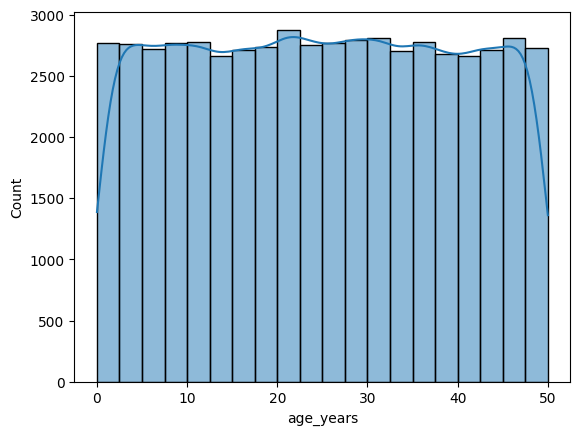

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a histogram with a Kernel Density Estimate (KDE) for 'age_years'
sns.histplot(df["age_years"],kde=True,bins=20)
# Display the plot
plt.show()

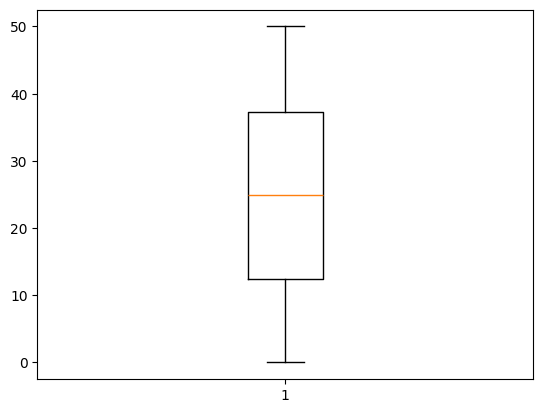

In [20]:
# Create a box plot to visualize the distribution and potential outliers of 'age_years'
plt.boxplot(df['age_years'])
# Display the plot
plt.show()

In [21]:
# Define the feature matrix X by dropping the target variable 'price_usd'
X=df.drop(columns='price_usd')
# Display the features DataFrame
X

,house_size_sqft,bedrooms,age_years,distance_to_center_km,bathrooms
0,2498.16,5,40.77,8.44,3.2
1,4802.86,3,0.32,9.04,2.5
2,3927.98,3,11.20,15.51,3.5
3,3394.63,3,14.93,17.46,3.9
4,1624.07,2,0.70,2.84,2.5
...,...,...,...,...,...
54995,3081.54,2,10.18,19.70,4.4
54996,3937.23,1,46.38,14.67,3.4
54997,4290.11,5,48.08,18.23,1.1
54998,3599.39,4,0.24,23.99,2.2


In [22]:
# Define the target variable Y as the 'price_usd' column
Y=df['price_usd']
# Display the target variable Series
Y

,price_usd
0,454138.62
1,850772.65
2,651234.20
3,678996.94
4,315468.35
...,...
54995,570018.82
54996,680072.95
54997,742734.87
54998,668950.37


In [23]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Display the shape of the training features (number of samples, number of features)
X_train.shape

(44000, 5)

In [25]:
# Display the shape of the testing features (number of samples, number of features)
X_test.shape

(11000, 5)

In [26]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
LR=LinearRegression()
# Fit the Linear Regression model to the training data
LR.fit(X_train,Y_train)

LinearRegression()

In [27]:
# Make predictions on the test set using the trained Linear Regression model
pred=LR.predict(X_test)
# Display the generated predictions
pred

array([767578.44939541, 347155.67816814, 564838.15735658, ...,
       354836.92283821, 693196.79237973, 829241.42935718])

In [28]:
# Calculate and display the R-squared score of the Linear Regression model on the test data
LR.score(X_test,Y_test)

0.9720972920046297

In [29]:
from sklearn.metrics import mean_squared_error
# Calculate and display the Mean Squared Error (MSE) between actual and predicted values
mean_squared_error(Y_test,pred)

906740243.56858

In [30]:
from sklearn.linear_model import Lasso, Ridge
# Initialize Lasso Regression model with a specified alpha (regularization strength)
LS=Lasso(alpha=1.4)
# Initialize Ridge Regression model with a specified alpha (regularization strength)
R=Ridge(alpha=2.5)
# Fit the Lasso model to the training data
LS.fit(X_train,Y_train)
# Fit the Ridge model to the training data
R.fit(X_train,Y_train)

Ridge(alpha=2.5)

In [31]:
# Calculate and display the R-squared score of the Lasso Regression model on the test data
LS.score(X_test,Y_test)

0.9720972657532567

In [32]:
R.score(X_test,Y_test)

0.9720972760853132

In [34]:
import gradio as gr
import numpy as np

# Define the prediction function using the trained Linear Regression model
def predict_price(house_size_sqft, bedrooms, age_years, distance_to_center_km, bathrooms):
    # Ensure the Linear Regression model (LR) is available and fitted
    if 'LR' not in globals() or not hasattr(LR, 'predict'):
        return "Error: Linear Regression model (LR) is not trained or accessible. Please run previous cells."

    # Create a NumPy array from the input values, reshaping for single sample prediction
    features = np.array([[house_size_sqft, bedrooms, age_years, distance_to_center_km, bathrooms]])

    try:
        # Make prediction using the Linear Regression model (LR)
        predicted_price = LR.predict(features)[0]
        return f"Predicted House Price: ${predicted_price:,.2f}"
    except Exception as e:
        return f"An error occurred during prediction: {e}"

# Define input components for Gradio interface
inputs = [
    gr.Slider(minimum=1000, maximum=5000, step=1, value=2500, label="House Size (sqft)"),
    gr.Slider(minimum=1, maximum=6, step=1, value=3, label="Bedrooms"),
    gr.Slider(minimum=0, maximum=50, step=0.1, value=20, label="Age of House (years)"),
    gr.Slider(minimum=1, maximum=30, step=0.1, value=15, label="Distance to City Center (km)"),
    gr.Slider(minimum=1, maximum=4.5, step=0.1, value=2.5, label="Bathrooms")
]

# Define output component for Gradio interface
output = gr.Textbox(label="Prediction")

# Create and launch the Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=output,
    title="House Price Predictor",
    description="Enter house details to get an estimated price using a Linear Regression model."
)

iface.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>